<a href="https://colab.research.google.com/github/ShakirJ25/QNC-Exercises/blob/main/Power_Analysis_091525.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

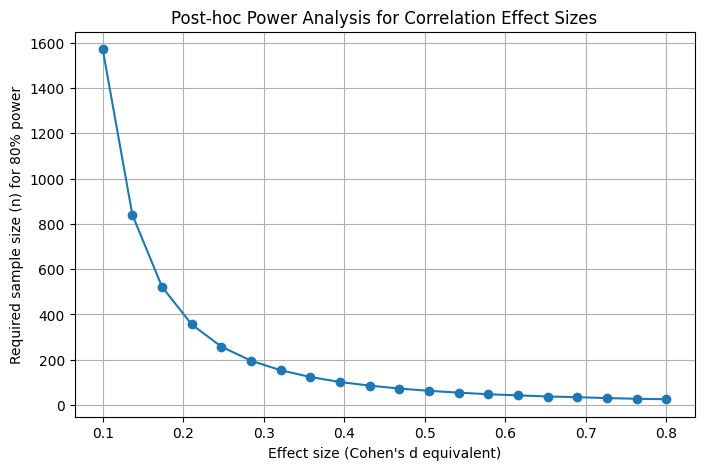

Effect size 0.10 → Required n ≈ 1571
Effect size 0.14 → Required n ≈ 840
Effect size 0.17 → Required n ≈ 522
Effect size 0.21 → Required n ≈ 356
Effect size 0.25 → Required n ≈ 258
Effect size 0.28 → Required n ≈ 196
Effect size 0.32 → Required n ≈ 154
Effect size 0.36 → Required n ≈ 124
Effect size 0.39 → Required n ≈ 102
Effect size 0.43 → Required n ≈ 86
Effect size 0.47 → Required n ≈ 73
Effect size 0.51 → Required n ≈ 63
Effect size 0.54 → Required n ≈ 55
Effect size 0.58 → Required n ≈ 48
Effect size 0.62 → Required n ≈ 43
Effect size 0.65 → Required n ≈ 38
Effect size 0.69 → Required n ≈ 35
Effect size 0.73 → Required n ≈ 31
Effect size 0.76 → Required n ≈ 28
Effect size 0.80 → Required n ≈ 26


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.power import TTestIndPower
from scipy.stats import poisson, norm, pearsonr

# ----------------------------
# Step 1: Simulate correlation coefficients (null distribution)
# ----------------------------
def simulate_correlations(n_samples=30, n_sims=1000, lam=5, mu=0, sigma=1):
    """Simulate correlation coefficients under null hypothesis."""
    corrs = []
    for _ in range(n_sims):
        # Independent data: LC (Poisson), pupil (Gaussian)
        lc_data = poisson.rvs(lam, size=n_samples)
        pupil_data = norm.rvs(mu, sigma, size=n_samples)
        r, _ = pearsonr(lc_data, pupil_data)
        corrs.append(r)
    return np.array(corrs)

null_corrs = simulate_correlations()

# ----------------------------
# Step 2: Power analysis
# ----------------------------
analysis = TTestIndPower()

# Effect sizes (Cohen's d equivalents for correlation)
# Convert correlation r to Cohen's d: d = 2r / sqrt(1-r^2)
effect_sizes = np.linspace(0.1, 0.8, 20)
sample_sizes = []

for es in effect_sizes:
    n = analysis.solve_power(effect_size=es, power=0.8, alpha=0.05, alternative='two-sided')
    sample_sizes.append(np.ceil(n))

# ----------------------------
# Step 3: Plot results
# ----------------------------
plt.figure(figsize=(8,5))
plt.plot(effect_sizes, sample_sizes, marker='o')
plt.xlabel("Effect size (Cohen's d equivalent)")
plt.ylabel("Required sample size (n) for 80% power")
plt.title("Post-hoc Power Analysis for Correlation Effect Sizes")
plt.grid(True)
plt.show()

# ----------------------------
# Step 4: Print a few results
# ----------------------------
for es, n in zip(effect_sizes, sample_sizes):
    print(f"Effect size {es:.2f} → Required n ≈ {n:.0f}")
